# XinQuan Ge

## Research question/interests

**As a spectator who often watches various e-sports competitions, I am very curious about which events attract the team most and which are the most lucrative. What was the performance of APEX Legends.**

In [15]:
import pandas as pd
import seaborn as sns
import numpy as np
import os
import matplotlib.pyplot as plt
df=pd.read_csv("ungraded/Team_prize.csv")

This data set counts the 30 teams with the largest income, and includes each team's income in some popular competitions

## Milestone 3
### Task 1: EDA

In [77]:
df.shape
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Rank                 30 non-null     int64  
 1   Team                 30 non-null     object 
 2   prize money          30 non-null     float64
 3   Apex Legends         14 non-null     float64
 4   Arena of Valor       9 non-null      float64
 5   Call of Duty         14 non-null     float64
 6   Clash Royale         8 non-null      float64
 7   Counter-Strike       7 non-null      float64
 8   CS:GO                20 non-null     float64
 9   Dota2                23 non-null     float64
 10  FIFA                 16 non-null     float64
 11  Fortnite             20 non-null     float64
 12  Halo                 9 non-null      float64
 13  Hearthstone          17 non-null     float64
 14  Heroes of the Storm  11 non-null     float64
 15  League of Legends    25 non-null     float

,Rank,Team,prize money,Apex Legends,Arena of Valor,Call of Duty,Clash Royale,Counter-Strike,CS:GO,Dota2,...,PUBG,PUBG Mobile,Rainbow Six,Rocket League,StarCraft,Super Smash Bros.,Valorant,WarCraft3,Wild Rift,World of Warcraft
0,1,Team Liquid,42087242.45,283629.11,0.0,26250.0,285649.77,5375341.35,NaN,24959041.10,...,1292402.3,NaN,1439879.51,84795.48,1679711.54,518364.48,376334.96,NaN,NaN,55000.0
1,2,OG,37361505.19,NaN,NaN,NaN,NaN,NaN,875442.10,36414545.63,...,NaN,NaN,NaN,NaN,NaN,6847.46,0.00,NaN,NaN,NaN
2,3,Evil Geniuses,26392821.19,NaN,NaN,917740.1,NaN,220686.74,1112032.00,21535682.62,...,2000.0,NaN,370892.86,163797.60,785480.90,NaN,22000.00,80795.13,NaN,88400.0
3,4,Team Spirit,21509255.51,0.00,NaN,NaN,NaN,NaN,981751.21,20210935.81,...,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Team Secret,19537491.01,NaN,NaN,NaN,NaN,NaN,67014.09,18245004.59,...,14700.0,360213.42,155188.69,96727.89,NaN,4437.58,63000.00,NaN,118550.52,NaN


Too many competitions are not easy to handle, I decided to keep the competition items of the most popular games."CS:GO","Dota2","Fortnite","League of Legends" have over 20 team join, It can be said that it is the competition of the most popular games."Apex Legends" and "Valorant" These two new games also have a good number of teams participating. Let's add them for comparison.

In [34]:
df_hot=df[["Team","prize money","Apex Legends","CS:GO","Dota2","Fortnite","League of Legends","Valorant"]]
df_hot.head()

,Team,prize money,Apex Legends,CS:GO,Dota2,Fortnite,League of Legends,Valorant
0,Team Liquid,42087242.45,283629.11,NaN,24959041.10,1402325.00,1359407.25,376334.96
1,OG,37361505.19,NaN,875442.10,36414545.63,NaN,NaN,0.00
2,Evil Geniuses,26392821.19,NaN,1112032.00,21535682.62,2400.00,222900.00,22000.00
3,Team Spirit,21509255.51,0.00,981751.21,20210935.81,NaN,0.00,NaN
4,Team Secret,19537491.01,NaN,67014.09,18245004.59,205425.38,32819.94,63000.00


In [35]:
df_hot.describe()

,prize money,Apex Legends,CS:GO,Dota2,Fortnite,League of Legends,Valorant
count,3.000000e+01,14.000000,2.000000e+01,2.300000e+01,2.000000e+01,2.500000e+01,19.000000
mean,1.467078e+07,205238.564286,2.664955e+06,1.030883e+07,3.949064e+05,1.026806e+06,142785.525263
std,8.445820e+06,237765.008134,2.816905e+06,9.312376e+06,6.806635e+05,1.778204e+06,156001.519182
min,7.074926e+06,0.000000,7.806770e+03,2.140210e+03,2.400000e+03,0.000000e+00,0.000000
25%,8.959982e+06,53937.250000,5.016455e+05,2.006332e+06,3.925000e+04,3.281994e+04,21942.120000
50%,1.240569e+07,169391.790000,1.759578e+06,9.239428e+06,1.308025e+05,2.229000e+05,88500.000000
75%,1.837319e+07,240000.255000,3.721151e+06,1.543177e+07,2.644533e+05,1.359407e+06,255881.000000
max,4.208724e+07,909873.760000,9.484169e+06,3.641455e+07,2.317844e+06,7.722468e+06,499000.000000


### Proportion of revenue from Apex competitions of each team

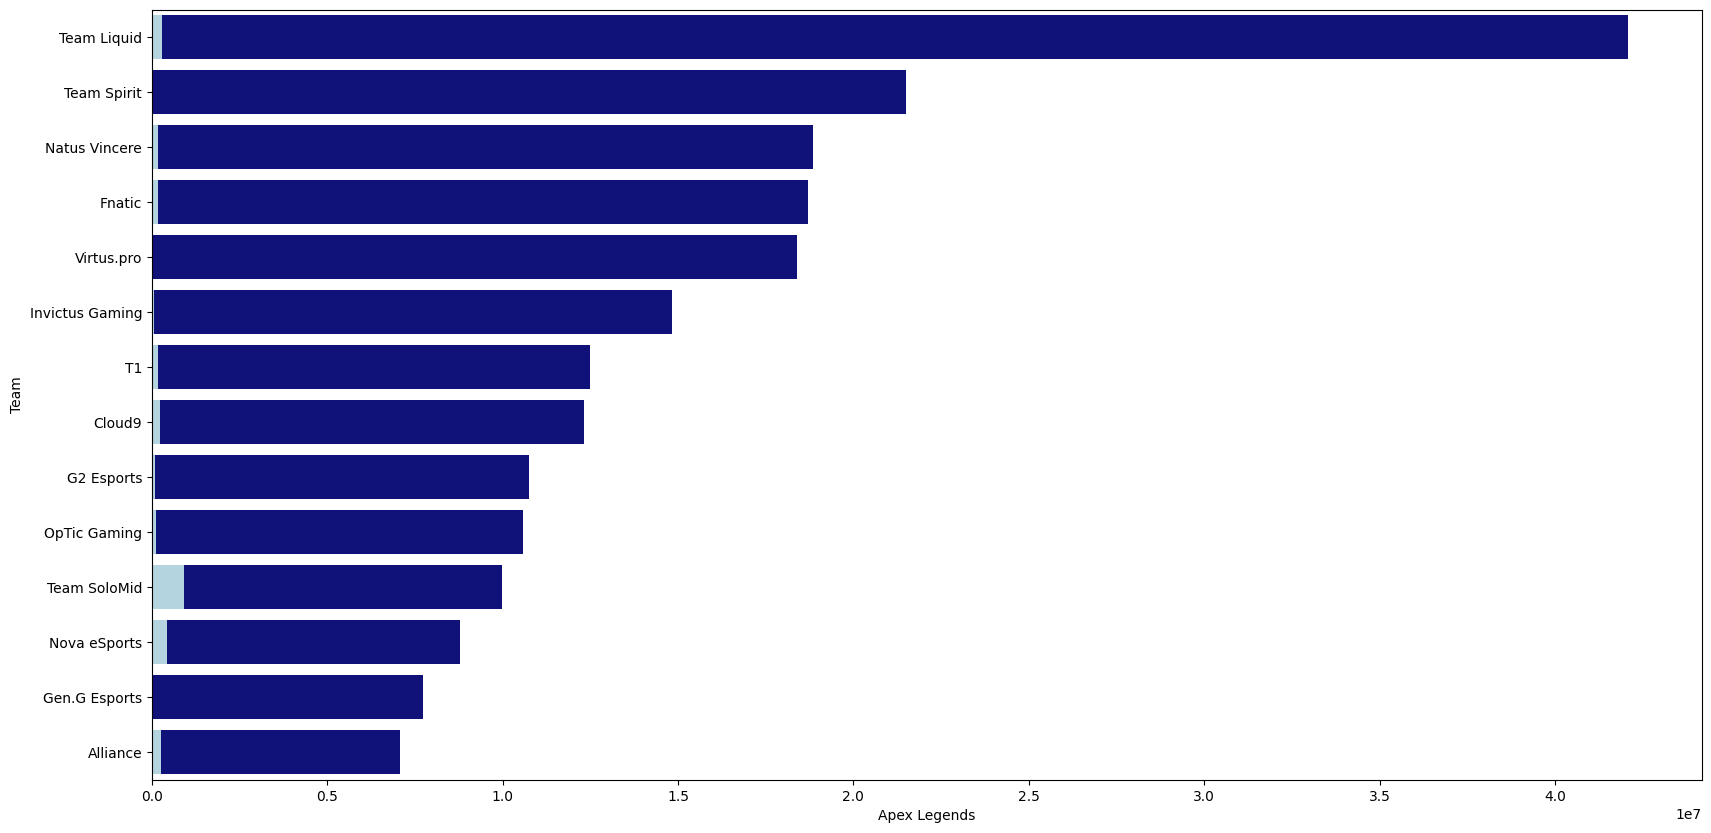

In [64]:
df_Apex=df_hot[["Team","prize money","Apex Legends"]]
df_Apex=df_Apex[df_Apex["Apex Legends"]>=0]
df_Apex
bar1=sns.barplot(data=df_Apex,y="Team",x="prize money",color='darkblue')
bar2=sns.barplot(data=df_Apex,y="Team",x="Apex Legends",color='lightblue')
plt.gcf().set_size_inches(20,10)

It can be seen that Apex is not a very important competition among these teams. Only 14 of the 30 teams participated in the competition. Except for Team SoloMid and Nova eSports, no other team has gained considerable income from it

### Proportion of revenue from Valorant competitions of each team

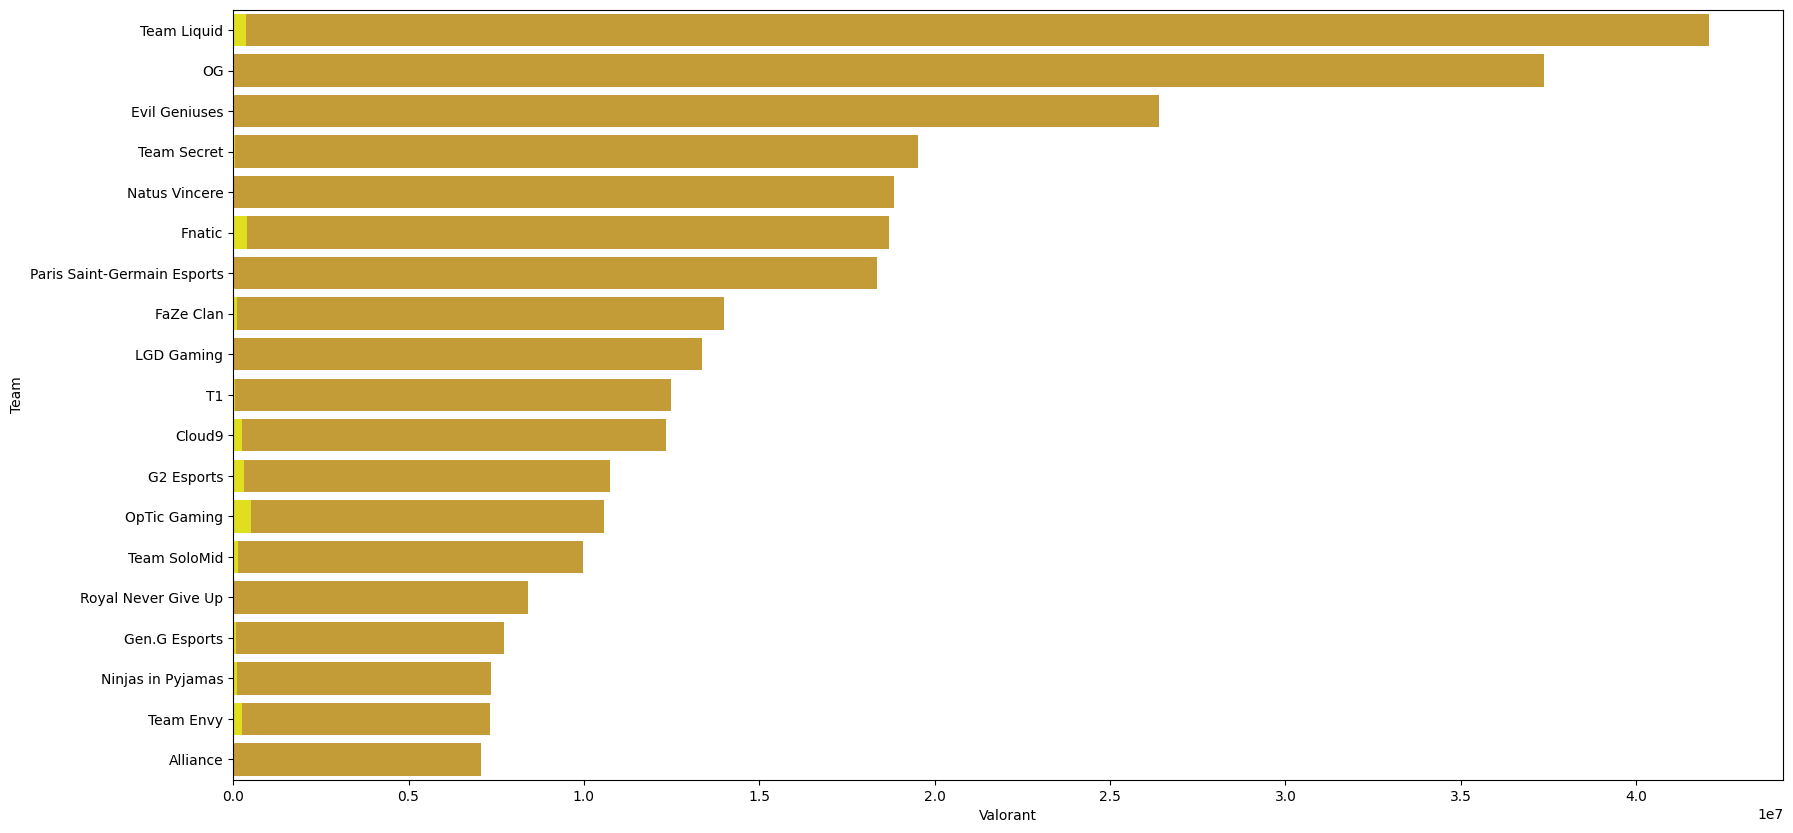

In [67]:
df_Valorant=df_hot[["Team","prize money","Valorant"]]
df_Valorant=df_Valorant[df_Valorant["Valorant"]>=0]
df_Valorant
bar1=sns.barplot(data=df_Valorant,y="Team",x="prize money",color='goldenrod')
bar2=sns.barplot(data=df_Valorant,y="Team",x="Valorant",color='Yellow')
plt.gcf().set_size_inches(20,10)

It is obvious that Vallorant does not have the ability to become the main source of income for the team. Slightly different from Apex, there are more teams involved.

### Proportion of revenue from CS:GO competitions of each team

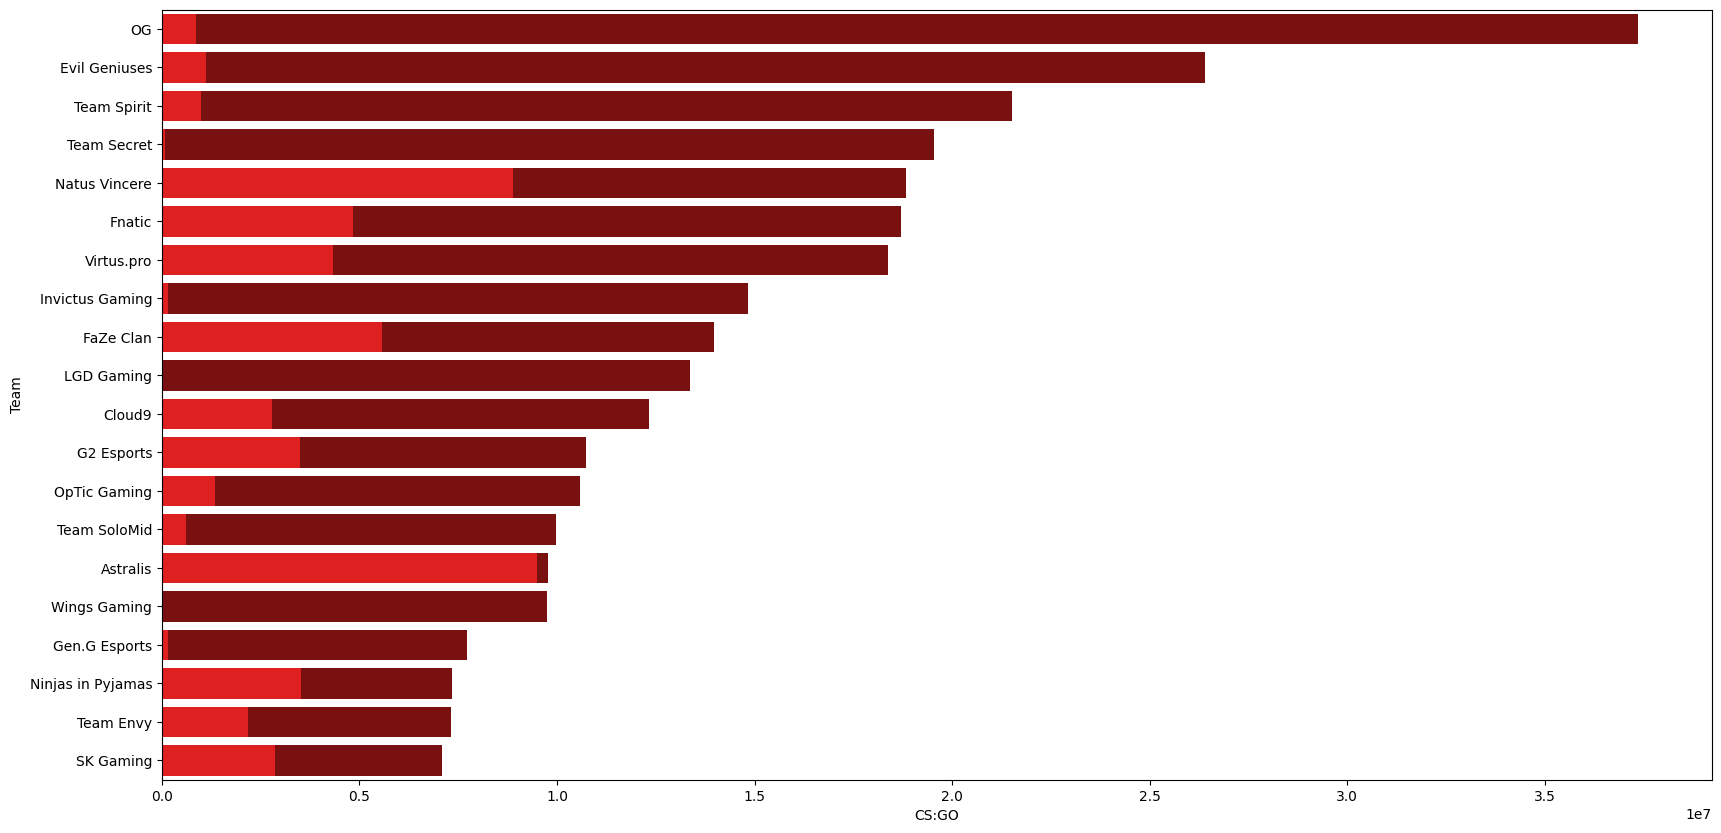

In [68]:
df_CS=df_hot[["Team","prize money","CS:GO"]]
df_CS=df_CS[df_CS["CS:GO"]>=0]
df_CS
bar1=sns.barplot(data=df_CS,y="Team",x="prize money",color='darkred')
bar2=sns.barplot(data=df_CS,y="Team",x="CS:GO",color='red')
plt.gcf().set_size_inches(20,10)

Like Vallorant, CS:GO are also First Person Shooters Game(FPS). However, as a senior, CS has obviously become an important source of income for many teams. Team Astralis'  income almost all comes from this game.

### Proportion of revenue from Dota2 competitions of each team

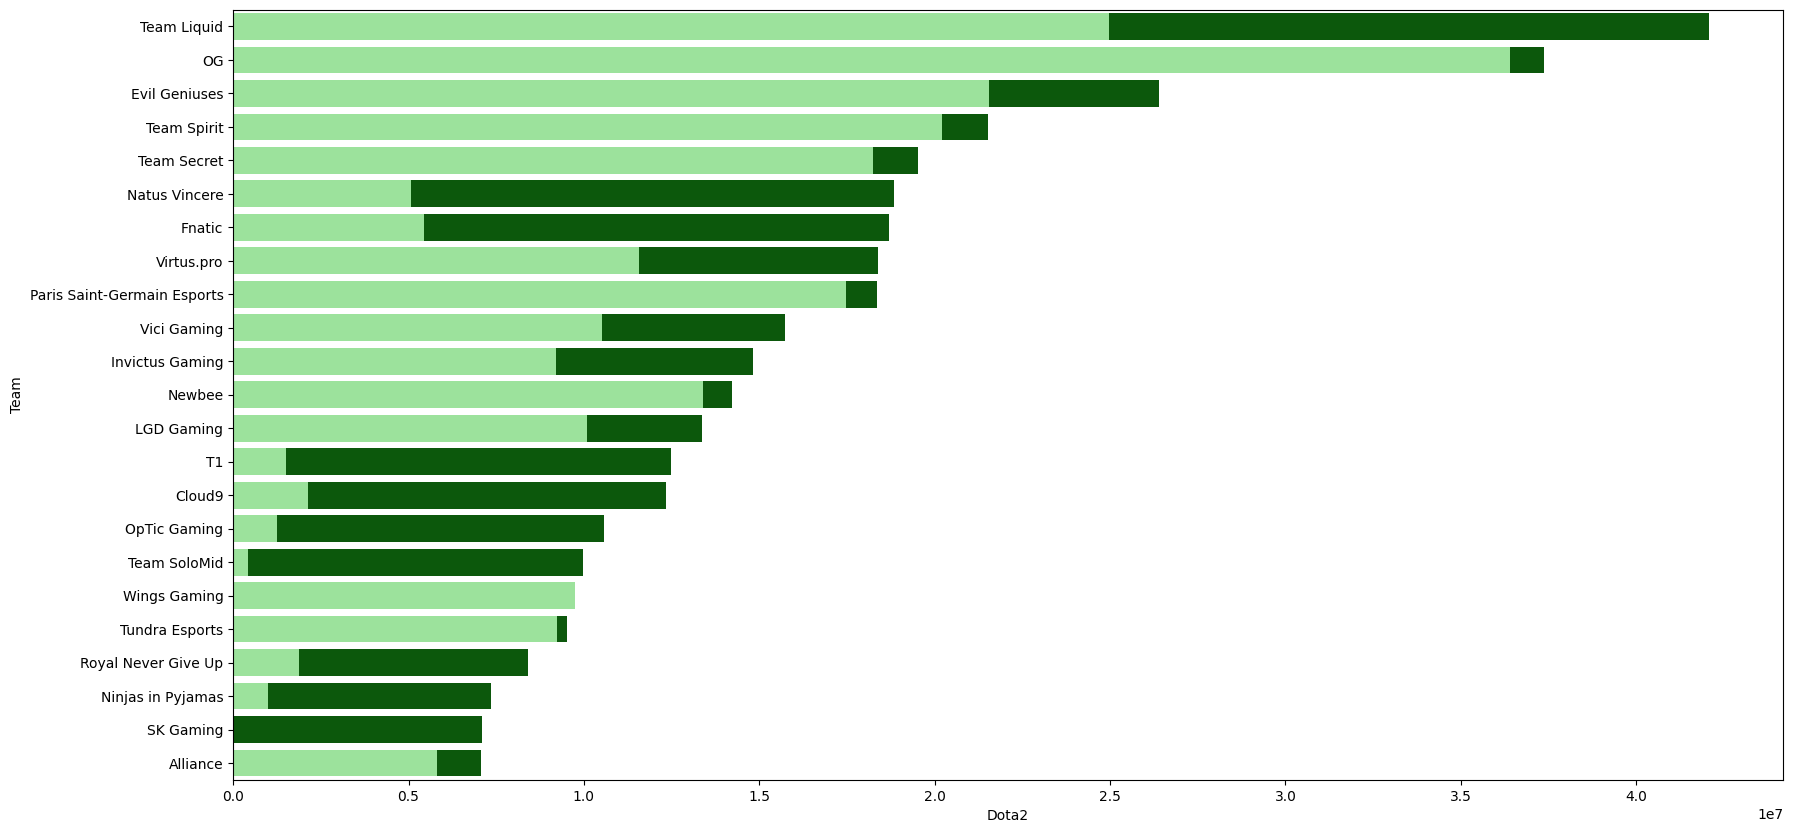

In [69]:
df_Dota2=df_hot[["Team","prize money","Dota2"]]
df_Dota2=df_Dota2[df_Dota2["Dota2"]>=0]
df_Dota2
bar1=sns.barplot(data=df_Dota2,y="Team",x="prize money",color='darkgreen')
bar2=sns.barplot(data=df_Dota2,y="Team",x="Dota2",color='lightgreen')
plt.gcf().set_size_inches(20,10)

If you want to pick the most important game in e-sports, Dota2 is almost the only choice. Whether it's the number of teams involved or the bonus of the competition. Are incomparable to other freshmen's game competitions. It's not even an exaggeration to say that some teams only exist to participate in Dota2, and their income basically comes from this.

### Proportion of revenue from Fortnite competitions of each team

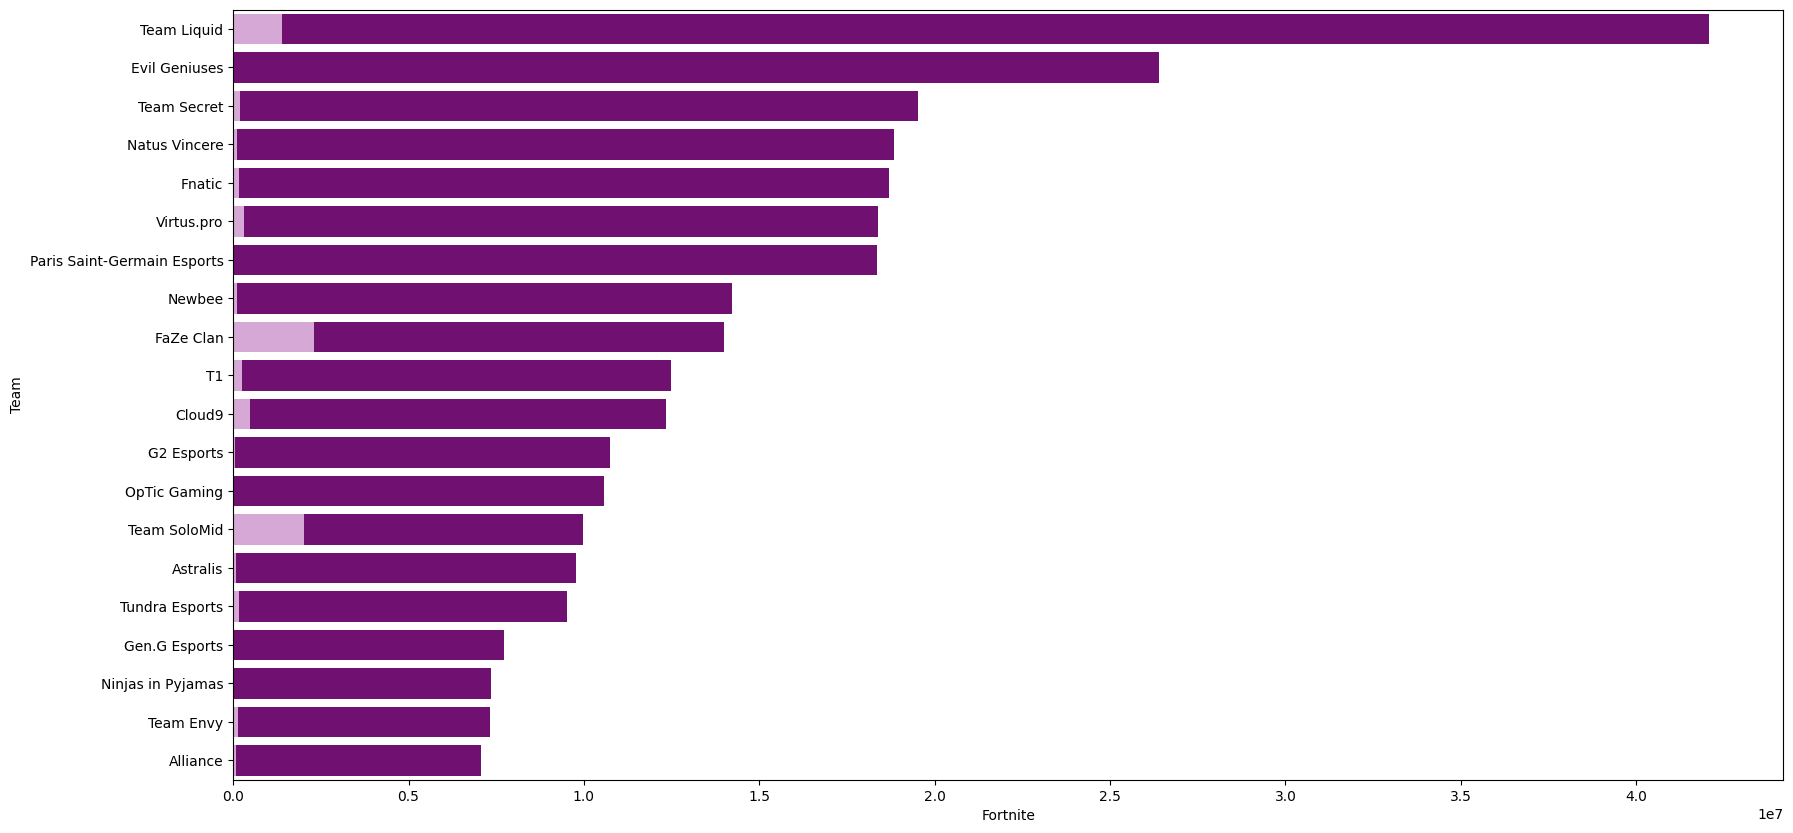

In [70]:
df_Fortnite=df_hot[["Team","prize money","Fortnite"]]
df_Fortnite=df_Fortnite[df_Fortnite["Fortnite"]>=0]
df_Fortnite
bar1=sns.barplot(data=df_Fortnite,y="Team",x="prize money",color='purple')
bar2=sns.barplot(data=df_Fortnite,y="Team",x="Fortnite",color='plum')
plt.gcf().set_size_inches(20,10)

The game mode of Fortnite is similar to Apex, which is also the object I want to focus on comparing with Apex. No matter the number of participating teams or the total income， Fortnite make better. However, compared with the popularity of this game, the data of it is still a bit low than my expect. Perhaps this is a common problem in Battle Royale game?

### Proportion of revenue from League of Legends competitions of each team

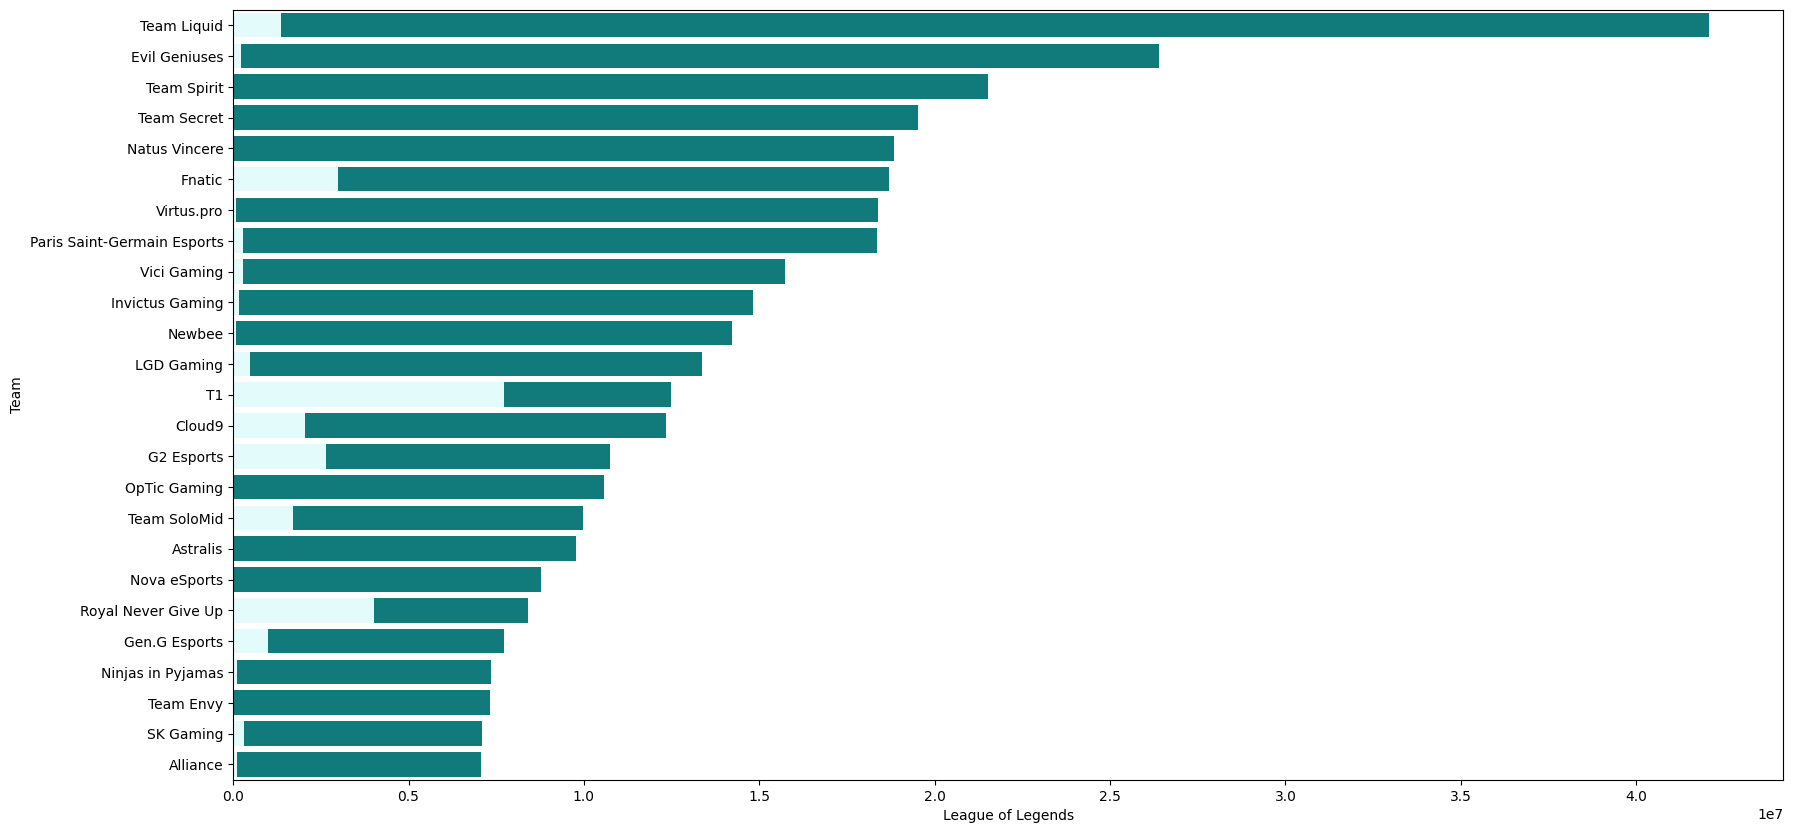

In [73]:
df_LOL=df_hot[["Team","prize money","League of Legends"]]
df_LOL=df_LOL[df_LOL["League of Legends"]>=0]
df_LOL
bar1=sns.barplot(data=df_LOL,y="Team",x="prize money",color='darkcyan')
bar2=sns.barplot(data=df_LOL,y="Team",x="League of Legends",color='lightcyan')
plt.gcf().set_size_inches(20,10)

Both League of Legends and Dota2 are Multiplayer Online Battle Arena (Moba) games. The League of Legends is also very popular this years. In the competitive competition, it is similar to CS:GO, although it cannot compete with Dota2, it still has a place in esports.

### Task 2: Data Analysis Pipeline

In [ ]:
df=pd.read_csv("ungraded/Team_prize.csv")

We used many modified tables in Task 1. Now move them here.

In [79]:
# All hot game
df_hot=df[["Team","prize money","Apex Legends","CS:GO","Dota2","Fortnite","League of Legends","Valorant"]]
df_hot.head()

,Team,prize money,Apex Legends,CS:GO,Dota2,Fortnite,League of Legends,Valorant
0,Team Liquid,42087242.45,283629.11,NaN,24959041.10,1402325.00,1359407.25,376334.96
1,OG,37361505.19,NaN,875442.10,36414545.63,NaN,NaN,0.00
2,Evil Geniuses,26392821.19,NaN,1112032.00,21535682.62,2400.00,222900.00,22000.00
3,Team Spirit,21509255.51,0.00,981751.21,20210935.81,NaN,0.00,NaN
4,Team Secret,19537491.01,NaN,67014.09,18245004.59,205425.38,32819.94,63000.00


In [ ]:
# Apex Legends
df_Apex=df_hot[["Team","prize money","Apex Legends"]]
df_Apex=df_Apex[df_Apex["Apex Legends"]>=0]

In [ ]:
# Valorant
df_Valorant=df_hot[["Team","prize money","Valorant"]]
df_Valorant=df_Valorant[df_Valorant["Valorant"]>=0]

In [ ]:
# CS:GO
df_CS=df_hot[["Team","prize money","CS:GO"]]
df_CS=df_CS[df_CS["CS:GO"]>=0]

In [ ]:
# Dota2
df_Dota2=df_hot[["Team","prize money","Dota2"]]
df_Dota2=df_Dota2[df_Dota2["Dota2"]>=0]

In [ ]:
# Fortnite
df_Fortnite=df_hot[["Team","prize money","Fortnite"]]
df_Fortnite=df_Fortnite[df_Fortnite["Fortnite"]>=0]

In [ ]:
# League of Legends
df_LOL=df_hot[["Team","prize money","League of Legends"]]
df_LOL=df_LOL[df_LOL["League of Legends"]>=0]

### Task 3: Method Chaining

In [11]:
import A2MC
init_data = A2MC.load_and_process("ungraded/Team_prize.csv")
clean_data= A2MC.load_Hot_Game(init_data)
clean_data.head()

,Team,prize money,Apex Legends,CS:GO,Dota2,Fortnite,League of Legends,Valorant
0,Team Liquid,42087242.45,283629.11,NaN,24959041.10,1402325.00,1359407.25,376334.96
1,OG,37361505.19,NaN,875442.10,36414545.63,NaN,NaN,0.00
2,Evil Geniuses,26392821.19,NaN,1112032.00,21535682.62,2400.00,222900.00,22000.00
3,Team Spirit,21509255.51,0.00,981751.21,20210935.81,NaN,0.00,NaN
4,Team Secret,19537491.01,NaN,67014.09,18245004.59,205425.38,32819.94,63000.00


### Task 4: Data Analysis

In [16]:
import A2MC
init_data = A2MC.load_and_process("ungraded/Team_prize.csv")
clean_data= A2MC.load_Hot_Game(init_data)

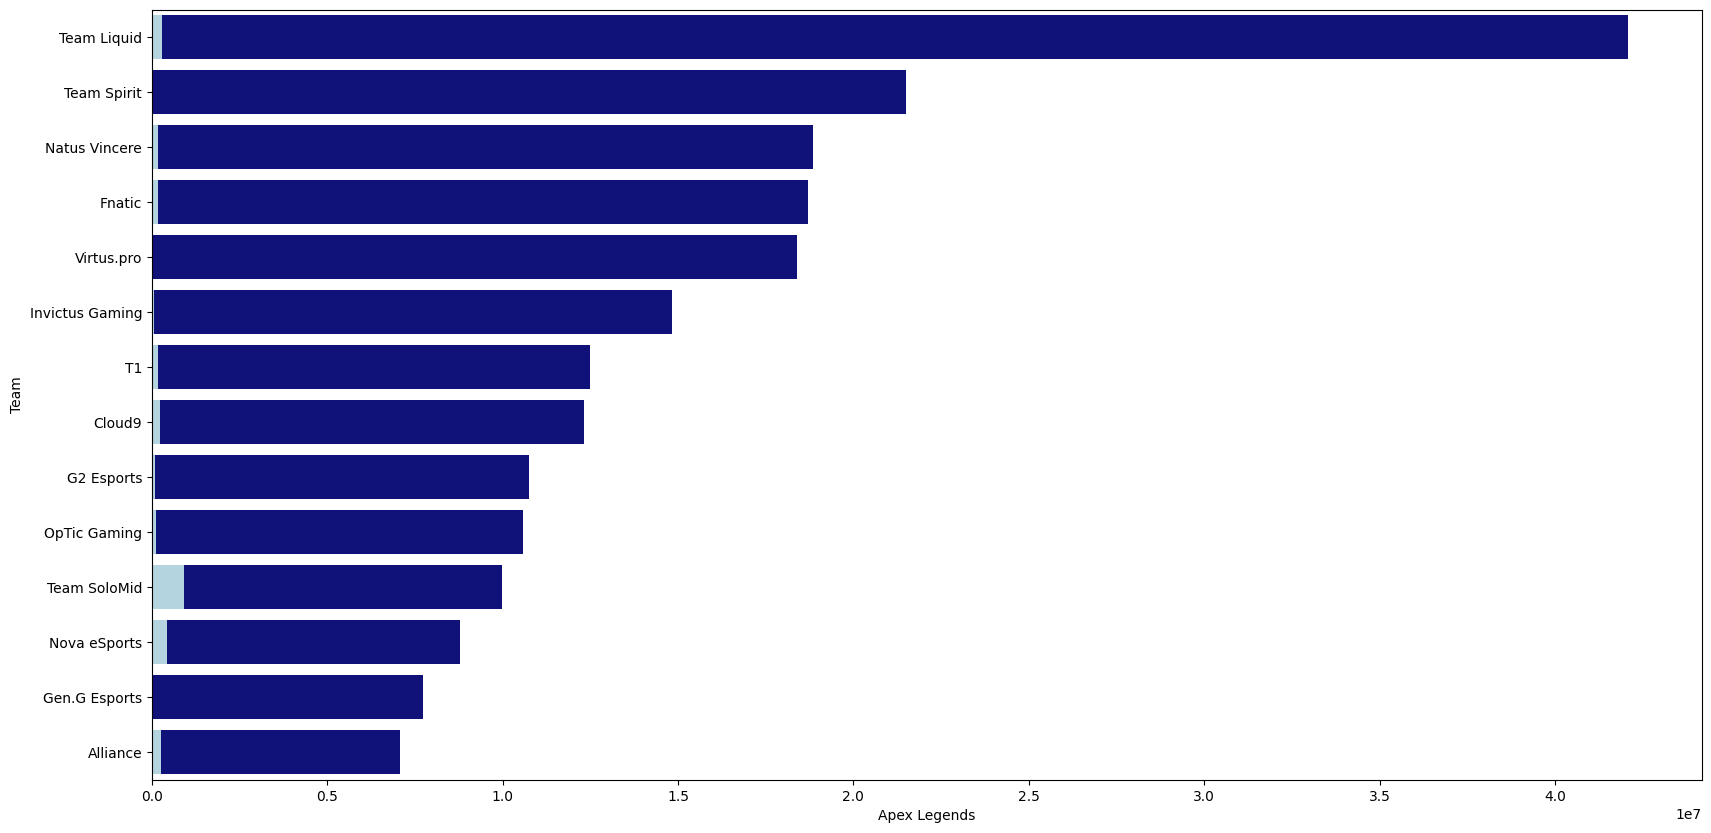

In [17]:
df_Apex=A2MC.load_Apex(clean_data)
bar1=sns.barplot(data=df_Apex,y="Team",x="prize money",color='darkblue')
bar2=sns.barplot(data=df_Apex,y="Team",x="Apex Legends",color='lightblue')
plt.gcf().set_size_inches(20,10)

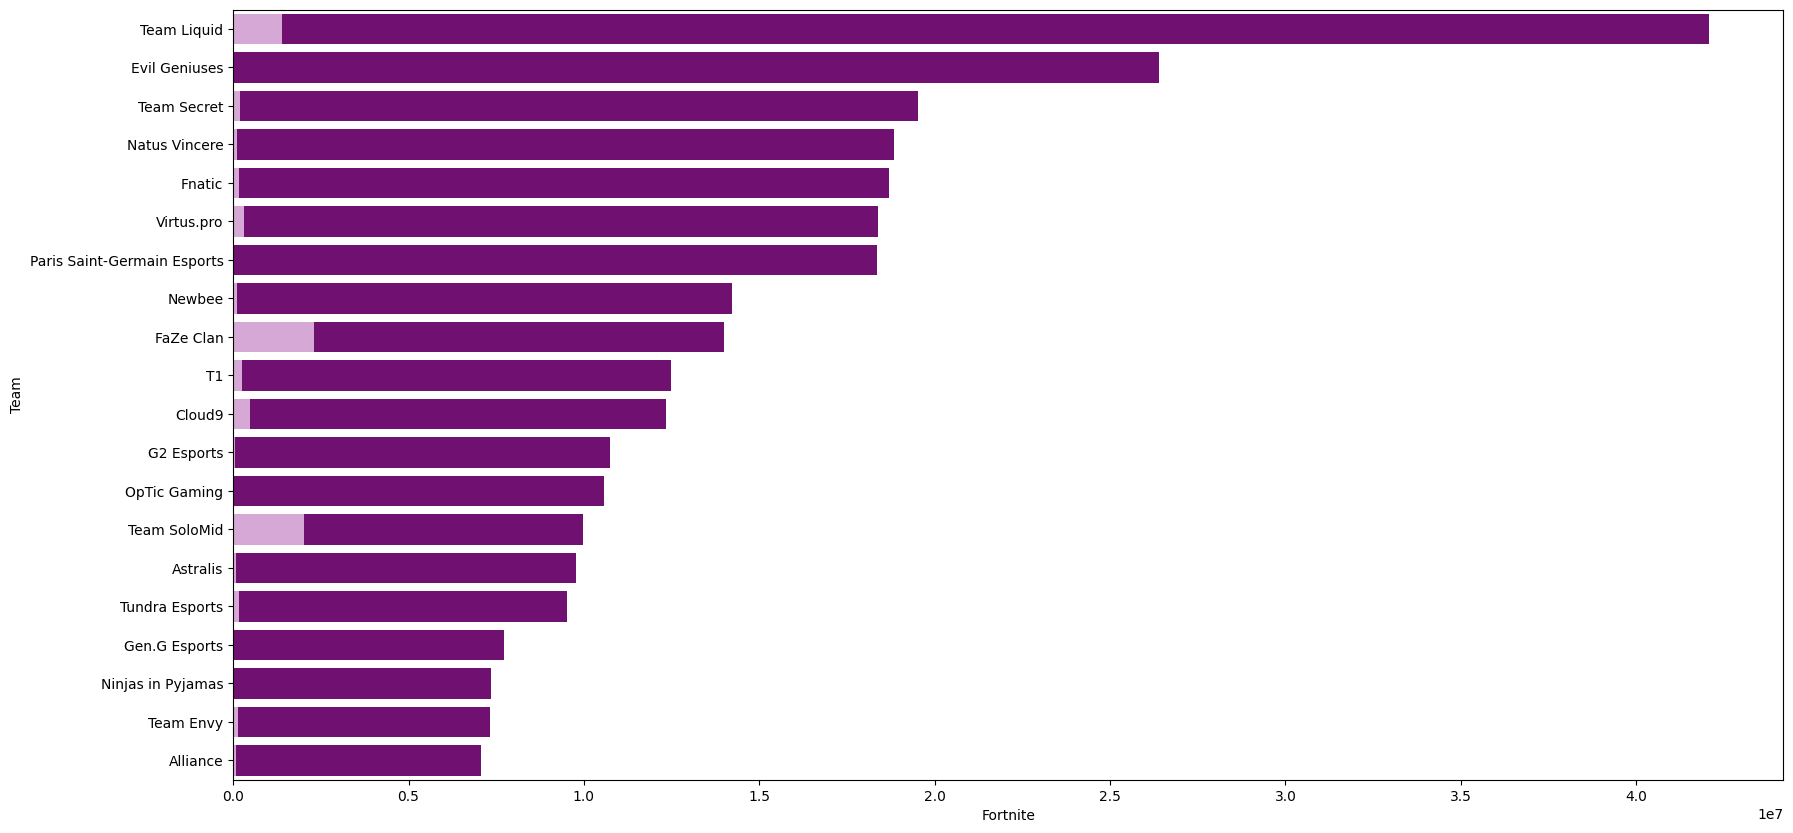

In [18]:
df_Fortnite=A2MC.load_Fortnite(clean_data)
bar1=sns.barplot(data=df_Fortnite,y="Team",x="prize money",color='purple')
bar2=sns.barplot(data=df_Fortnite,y="Team",x="Fortnite",color='plum')
plt.gcf().set_size_inches(20,10)

Although the Fortnite has a same game type with Apex, it obviously has a larger scale of the game that held the game earlier. It is reasonable that each team can get more generous bonuses.Of the 14 teams that participated in Apex, only Team SoloMid received a considerable bonus. But for the Fortnite, Team Liquid, FaZe and Team SoloMid all got very good income from it. It can be said that among the 30 teams, Team SoloMid is already the top team in Battle Royale game. But it can be seen from the total income that it is not enough to rely on Apex and Fortnite to obtain a large number of bonuses.